# Проект по анализу данных 

Рейтинг университетов.

Для анализа рейтингов университетов по всему миру используются данные с сайта kaggle.com (ссылка: https://www.kaggle.com/mylesoneill/world-university-rankings)

__ Цели и задачи проекта: __

Определение места университета в мировых рейтингах в соответствии с имеющимися данными, что позволит университетам выделить наиболее приоритеные направления развития для увеличения своей популярности и мирового признания.



__Описание набора данных__
Данные представляют собой три независимых рейтинга университетов мира и две базы данных
    Рейтинг Times Higher Education World University Ranking 
    Рейтинг Academic Ranking of World Universities
    Рейтинг Center for World University Rankings
    Данные по качеству образования
    Данные по государственым и частным затратам на образование 

In [2]:
import pandas as pd
import scipy.stats 
import numpy as np
import matplotlib.pyplot as plt
import operator
from sklearn.preprocessing import normalize
from scipy.stats.stats import pearsonr
%matplotlib inline
df1 = pd.read_csv('timesData.csv')
df2 = pd.read_csv('shanghaiData.csv')
school_country = pd.read_csv('school_and_country_table.csv')
df3 = pd.read_csv('cwurData.csv')
attain_sup = pd.read_csv('educational_attainment_supplementary_data.csv')
expend_sup = pd.read_csv('education_expenditure_supplementary_data.csv', engine='python')

In [80]:
pd.options.mode.chained_assignment = None

Изучим переменные, представленные в каждом рейтинге:

In [3]:
df = [df1, df2, df3] # список из баз данных по рейтингам университетов
names_rank = ['Times Higher Education World University Ranking', 'Academic Ranking of World Universities', 'Center for World University Rankings']
# names_rank список официальных наименований рейтингов
for i in range(len(df)):
    col = (df[i]).columns
    print(names_rank[i])
    print(col)
    print('\n')

Times Higher Education World University Ranking
Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')


Academic Ranking of World Universities
Index(['world_rank', 'university_name', 'national_rank', 'total_score',
       'alumni', 'award', 'hici', 'ns', 'pub', 'pcp', 'year'],
      dtype='object')


Center for World University Rankings
Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')




__Список перемнных:__
1. Times Higher Education World University Ranking:
    * world_rank - мировой рейтинг для университета
    * university_name - название унивеситета
    * country - страна, в которой находится университет
    * teaching - баллы университета за обучение
    * international - баллы университета за международное сотрудничество(преподаватели, студенты, исследования)
    * research - баллы университета за исследования
    * citations - баллы университета за цитирование
    * income - баллы университета за вклад в образование(перемещение знаний)
    * total_score - итоговый балл
    * num_students - количество обучаемых студентов
    * student_staff_ratio - соотношение числа студентов и преподавателей
    * international_students - процент иностранных студентов
    * female_male_ratio - соотношение женщин и мужчин среди студентов
    * year - год, в котором составлялся рейтинг
2. Academic Ranking of World Universities:
    * world_rank - мировой рейтинг для университета
    * university_name - название унивеситета
    * national_rank - рейтинг университета в пределах своей страны
    * total_score - итоговый балл
    * alumni - баллы университета за успешних выпускников(лауреаты Нобелевской премии или других наград)
    * award - баллы университета за успешних преподавателей(лауреаты Нобелевской премии)
    * hici - баллы университета за высоко оцененных исследователей
    * ns - баллы университета за публикации в Nature and Science
    * pub - баллы университета за общее количество публикаций
    * pcp - взвешенные баллы университета за преподавателей на полной ставке
    * year - год, в котором составлялся рейтинг
3. Academic Ranking of World Universities:
    * world_rank - мировой рейтинг для университета
    * institution - название унивеситета
    * country - страна, в которой находится университет
    * national_rank - рейтинг университета в пределах своей страны
    * quality_of_education - рейтинг качеству образования
    * alumni_employment - рейтинг по трудоустройству выпускников
    * quality_of_faculty - рейтинг по качеству преподавательского состава
    * publications - рейтинг университета по публикациям
    * influence - рейтинг университета по влиянию
    * citations - рейтинг университета по цитированию
    * broad_impact - рейтинг университета по общему влиянию
    * patents - рейтинг университета по патентам
    * score - итоговый балл
    * year - год, в котором составлялся рейтинг

Помимо трех мировых рейтингов среди данных присутсвуют три базы данных:
1. School and Country
    * school name - название унивеситета
    * country - страна, в которой находится университет
2. Educational attainment 
    * country_name - страна
    * series_name - среднее количество лет обучения; уровень образования в зависимости от половозрастной группы; плотность населения(Barro-Lee Dataset (2014)); среднее количесто лет обучения, доля населения в возрасте 25+ распределнных в зависимости от уровня образования (UNESCO Institute for Statistics; 152 страны; 1985-2015)
    * 1985, 2015 - год
    * Barro-Lee Dataset (2014) 
    * UNESCO Institute for Statistics (UIS)
3. Education expenditure
    * country - страна
    * institute_type - тип образовательного учреждения(начальная, средняя школа, высшие учебные заведения)
    * direct_expenditure_type - тип затрат на образование(государственные, частные или общие)
    * 1995, 2011 - год

Посмотрим на общие характеристики набора данных

In [4]:
print('Times Higher Education World University Ranking')
shape = df1.shape
print('Размерность составленного рейтинга:','количество наблюдений', shape[0], ';', 'количество переменных', shape[1])
df1.describe().T   

Times Higher Education World University Ranking
Размерность составленного рейтинга: количество наблюдений 2603 ; количество переменных 14


,count,mean,std,min,25%,50%,75%,max
teaching,2603,37.801498,17.604218,9.9,24.700,33.9,46.40,99.7
research,2603,35.910257,21.254805,2.9,19.600,30.5,47.25,99.4
citations,2603,60.921629,23.073219,1.2,45.500,62.5,79.05,100.0
student_staff_ratio,2544,18.445283,11.458698,0.6,11.975,16.1,21.50,162.6
year,2603,2014.075682,1.685733,2011.0,2013.000,2014.0,2016.00,2016.0


In [5]:
print('Academic Ranking of World Universities')
shape = df2.shape
print('Размерность составленного рейтинга:','количество наблюдений', shape[0], ';', 'количество переменных', shape[1])
df2.describe().T   

Academic Ranking of World Universities
Размерность составленного рейтинга: количество наблюдений 4897 ; количество переменных 11


,count,mean,std,min,25%,50%,75%,max
total_score,1101,36.383470,13.557186,23.5,27.4,31.3,41.8,100
alumni,4896,9.161724,14.140636,0.0,0.0,0.0,15.6,100
award,4895,7.691910,15.494110,0.0,0.0,0.0,13.4,100
hici,4895,16.221491,14.382710,0.0,7.3,12.6,21.7,100
ns,4875,16.078503,12.511529,0.0,8.0,12.8,19.8,100
pub,4895,38.254648,13.050809,7.3,28.9,36.0,45.3,100
pcp,4895,21.242329,9.254351,8.3,15.6,19.0,24.5,100
year,4897,2009.658566,3.197576,2005.0,2007.0,2009.0,2012.0,2015


In [6]:
print('Center for World University Rankings')
shape = df3.shape
print('Размерность составленного рейтинга:','количество наблюдений', shape[0], ';', 'количество переменных', shape[1])
df3.describe().T   

Center for World University Rankings
Размерность составленного рейтинга: количество наблюдений 2200 ; количество переменных 14


,count,mean,std,min,25%,50%,75%,max
world_rank,2200,459.590909,304.320363,1.00,175.75,450.5,725.250,1000
national_rank,2200,40.278182,51.740870,1.00,6.00,21.0,49.000,229
quality_of_education,2200,275.100455,121.935100,1.00,175.75,355.0,367.000,367
alumni_employment,2200,357.116818,186.779252,1.00,175.75,450.5,478.000,567
quality_of_faculty,2200,178.888182,64.050885,1.00,175.75,210.0,218.000,218
publications,2200,459.908636,303.760352,1.00,175.75,450.5,725.000,1000
influence,2200,459.797727,303.331822,1.00,175.75,450.5,725.250,991
citations,2200,413.417273,264.366549,1.00,161.00,406.0,645.000,812
broad_impact,2000,496.699500,286.919755,1.00,250.50,496.0,741.000,1000
patents,2200,433.346364,273.996525,1.00,170.75,426.0,714.250,871


In [7]:
print('School and Country')
shape = school_country.shape
print('Размерность составленного рейтинга:','количество наблюдений', shape[0], ';', 'количество переменных', shape[1])
school_country.describe().T   

School and Country
Размерность составленного рейтинга: количество наблюдений 818 ; количество переменных 2


,count,unique,top,freq
school_name,818,818,Federal University of Paraná (UFPR),1
country,818,70,United States of America,161


In [8]:
# Educational attainment охватывает промежуток с 1985-2015, так как рейтинги охватывают промежуток с 2005 по 2016
# выведем данные за период с 2005-2015
print('Educational attainment')
attain_sup_2005_2015 = attain_sup.iloc[:,[0,1,19,20,21,22,23,24,25,26,27,28]]
shape_0 = attain_sup.shape
shape = attain_sup_2005_2015.shape
print('Размерность составленного рейтинга:','количество наблюдений', shape_0[0], ';', 'количество переменных', shape_0[1])
print('Размерность составленного рейтинга 2005-2015:','количество наблюдений', shape[0], ';', 'количество переменных', shape[1])
attain_sup_2005_2015.describe().T   

Educational attainment
Размерность составленного рейтинга: количество наблюдений 79055 ; количество переменных 29
Размерность составленного рейтинга 2005-2015: количество наблюдений 79055 ; количество переменных 12


,count,mean,std,min,25%,50%,75%,max
2005,52037,363.519873,8563.497493,0.00000,1.930000,7.250000,26.410000,1034076.00000
2006,204,13.172861,14.756343,0.12933,5.855385,8.623460,15.203413,93.68704
2007,286,16.073780,22.696642,0.00000,3.057243,9.234600,16.020193,99.99305
2008,366,14.849021,17.947568,0.00000,5.408055,9.460645,14.590020,97.70276
2009,464,17.527544,22.434285,0.00000,4.462345,10.165165,17.457817,98.72121
2010,52796,386.641842,9146.338286,0.00000,2.010000,7.470000,27.000000,1090693.00000
2011,929,20.351652,25.186301,0.00000,2.743710,10.797220,25.529380,99.52137
2012,1106,19.483375,24.036373,0.00000,1.498103,10.602820,26.929520,98.67698
2013,1879,23.113742,28.481772,0.00000,1.050885,11.875010,31.535075,100.00000
2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print('Education expenditure')
shape = expend_sup.shape
print('Размерность составленного рейтинга:','количество наблюдений', shape[0], ';', 'количество переменных', shape[1])
expend_sup.describe().T   

Education expenditure
Размерность составленного рейтинга: количество наблюдений 333 ; количество переменных 9


,count,mean,std,min,25%,50%,75%,max
1995,94,3.106383,1.790465,0.1,1.10,3.40,4.50,6.8
2000,99,3.062626,1.725475,0.5,1.20,3.30,4.35,6.6
2005,106,3.142453,1.752329,0.3,1.20,3.45,4.30,7.2
2009,103,3.388350,1.869534,0.3,1.35,3.70,4.85,7.5
2010,101,3.392079,1.883119,0.5,1.30,3.60,4.80,7.6
2011,282,2.573050,2.130673,0.0,0.70,1.75,4.30,7.9


Помимо этого, можно посмотреть попарную визуализацию всех признаков любой из представленных баз данных.
Так как использование данного пакета предполагает отсутствие пропущенных значений в базе данных, удалим все пропущенные значения из первого рейтинга (Times) и визуализируем их, аналогично использование этого метода и на других данных

Так как данные охватывают периоды не в один год, посмотрим, какие периоды представлены в рейтингах и сколько наблюдений (университетов) было включено в рейтинг в каждый год 

In [10]:
for i in range(len(df)):
    a = (df[i])['year'].value_counts()
    print(names_rank[i])
    print(a)
    print('\n')

Times Higher Education World University Ranking
2016    800
2012    402
2015    401
2013    400
2014    400
2011    200
Name: year, dtype: int64


Academic Ranking of World Universities
2007    510
2008    503
2009    501
2015    500
2011    500
2014    500
2010    500
2006    500
2005    500
2012    284
2013     99
Name: year, dtype: int64


Center for World University Rankings
2015    1000
2014    1000
2013     100
2012     100
Name: year, dtype: int64




В результате, мы получили, что рейтинги возможно сравнить друг с другом в период с 2012-2015 года, поэтому будем использовать этот временной промежуток при сравнении рейтингов.

In [11]:
years = [2012, 2013, 2014, 2015] 

Построим распределение **total score** для всех рейтингов в одни и те же периоды:

In [13]:
df1 = df1[df1.total_score != '-']

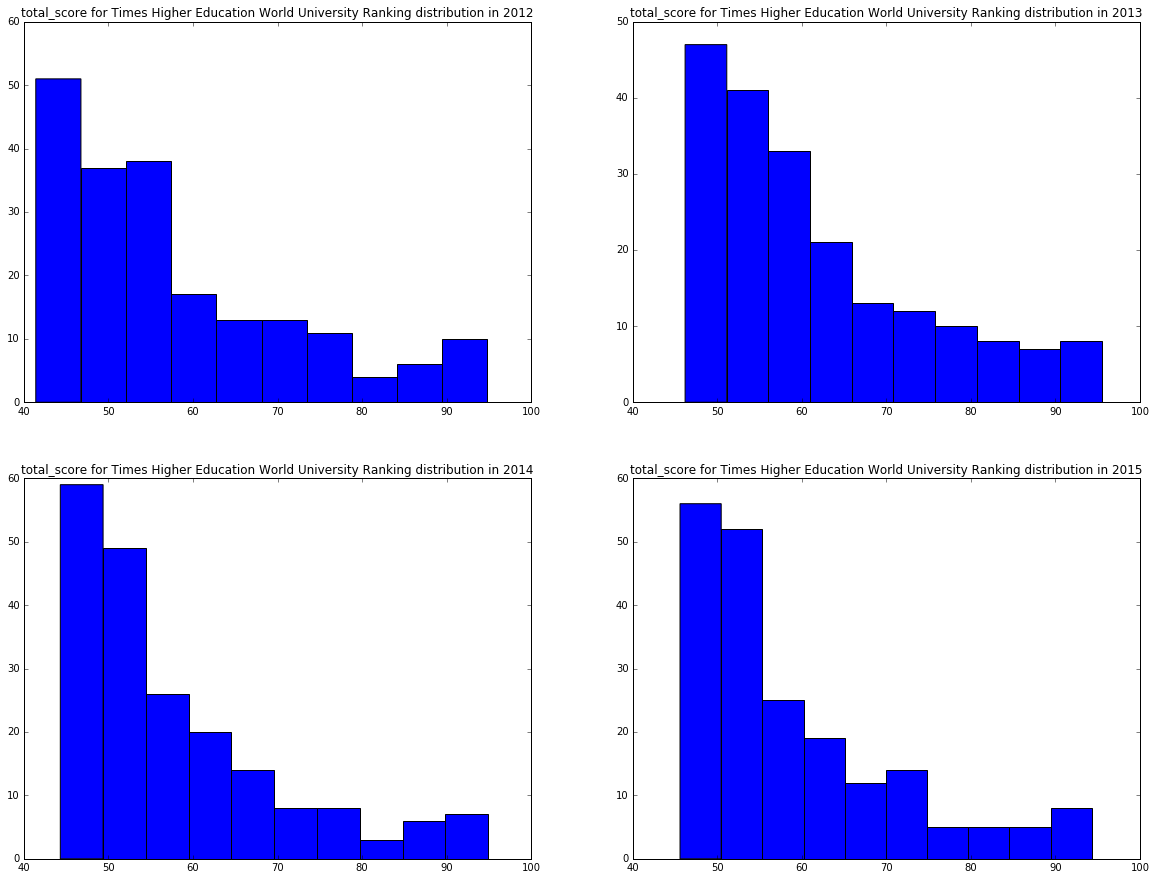

In [15]:
f,a = plt.subplots(2,2, figsize=(20,15))
a = a.ravel()
for i,ax in enumerate(a):
    ax.hist(df1[df1['year'] == years[i]]['total_score'].astype(float).values)
    ax.set_title("total_score for Times Higher Education World University Ranking distribution in %s" % years[i])


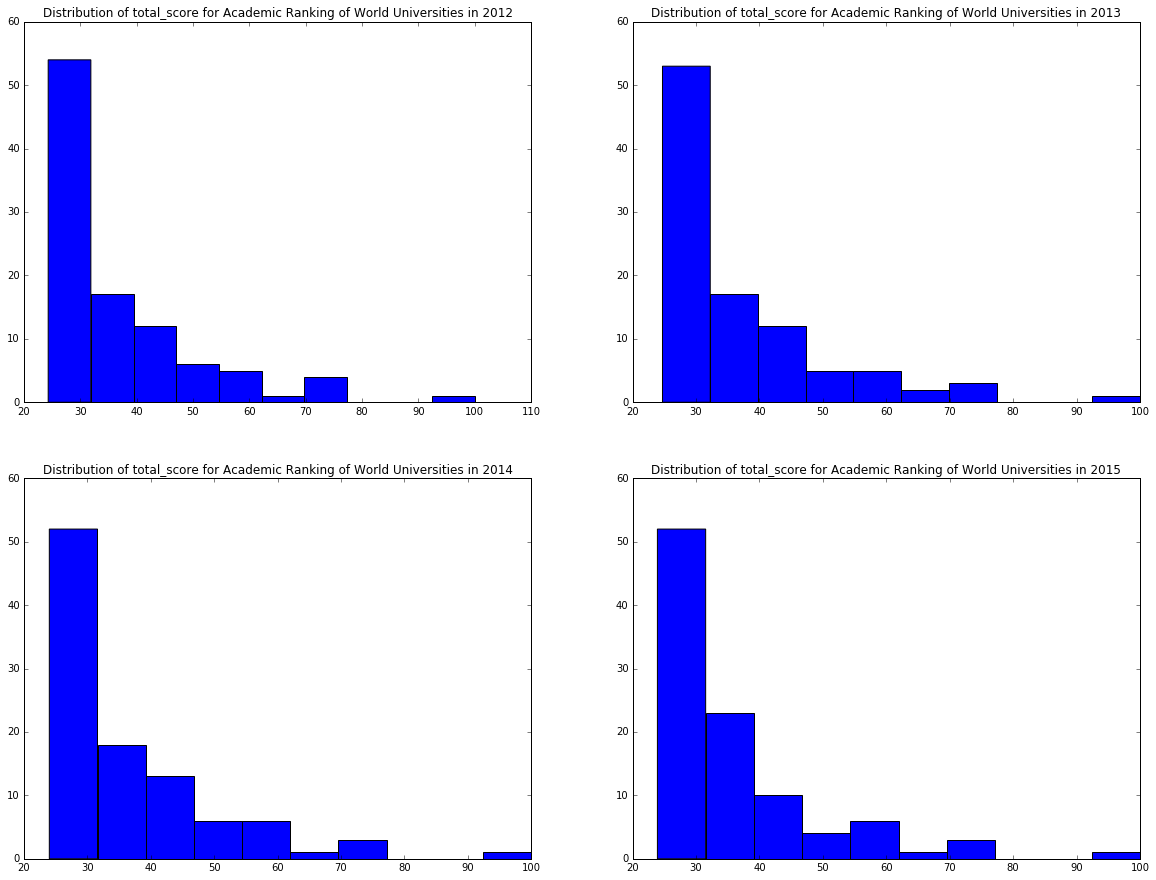

In [16]:
f,a = plt.subplots(2,2, figsize=(20,15))
a = a.ravel()
for i,ax in enumerate(a):
    x = df2[df2['year'] == years[i]]['total_score'].astype(float).values
    x = x[~np.isnan(x)]
    ax.hist(x)
    ax.set_title("Distribution of total_score for Academic Ranking of World Universities in %s" % years[i])

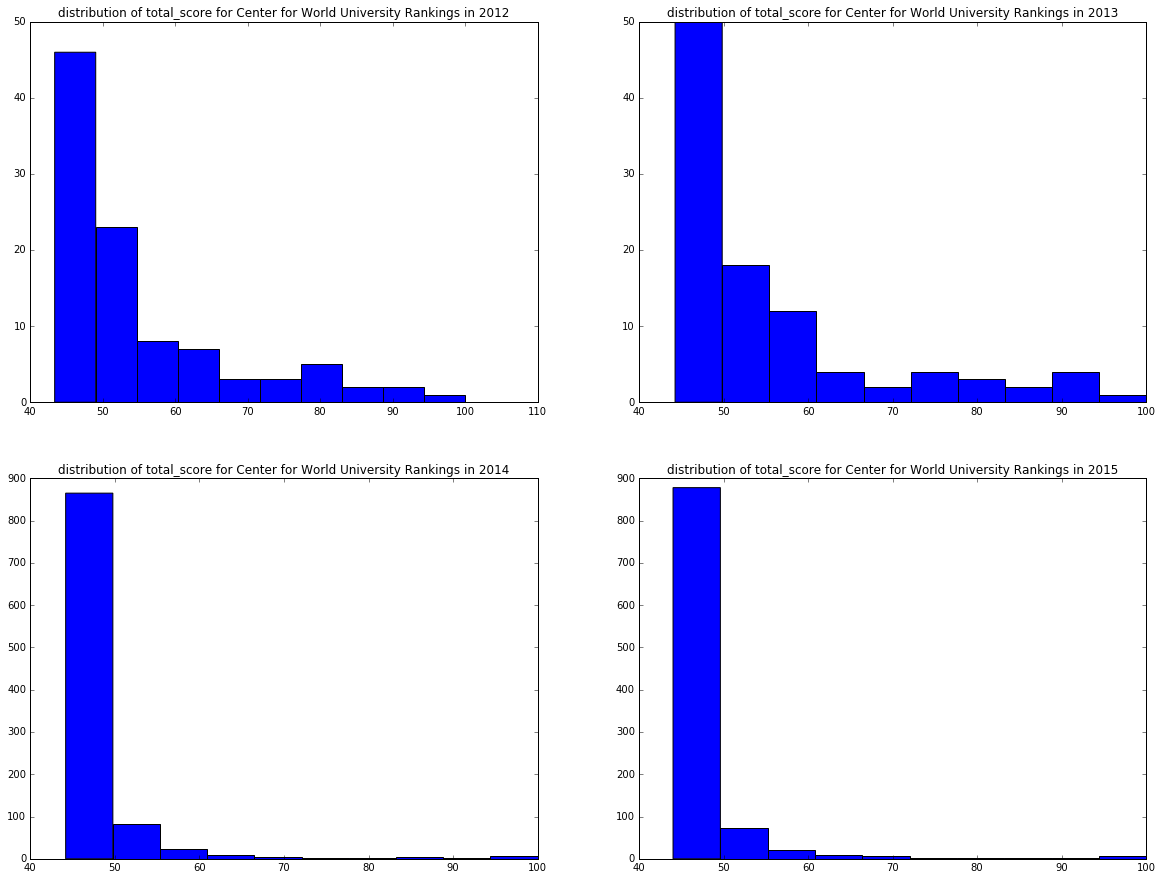

In [17]:
f,a = plt.subplots(2,2, figsize=(20,15))
a = a.ravel()
for i,ax in enumerate(a):
    ax.hist(df3[df3['year'] == years[i]]['score'].astype(float).values)
    ax.set_title("distribution of total_score for Center for World University Rankings in %s" % years[i])

In [18]:
df2['country'] = ['0']*len(df2)

Во втором рейтиге отсутствует переменная country. С помощью таблицы school and country постараемся восстановить страну для каждого университета. В тех ячейках, для которых не получилось восстановить данные, поставим "0"

In [19]:
for i in range(len(df2)):
    if not school_country[school_country['school_name'] == df2.loc[i]['university_name']].empty:
        df2.set_value(i, 'country', school_country[school_country['school_name'] == df2.loc[i]['university_name']]['country'].values[0])
df2.head(5)

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year,country
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005,United States of America
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005,United Kingdom
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005,United States of America
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005,United States of America
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005,0


Удалим из таблицы строки, в которых country имеет значение "0", затем построим распределение университетов из 2 рейтинга по странам:

In [20]:
df2fixed = df2[df2['country'] != '0'] 

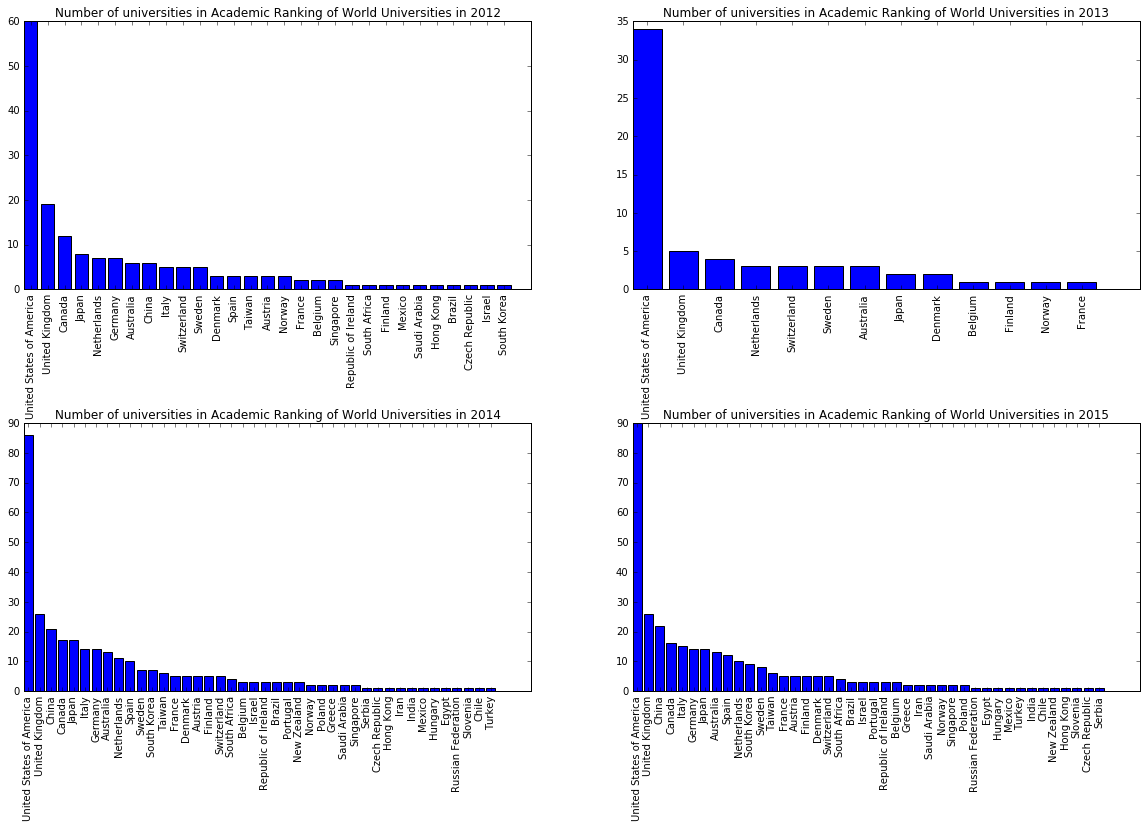

In [21]:
f,a = plt.subplots(2,2, figsize=(20,12))
a = a.ravel()
for i,ax in enumerate(a):
    n = np.arange(len(df2fixed[df2fixed['year'] == years[i]]['country'].value_counts())) 
    ax.bar(n, df2fixed[df2fixed['year'] == years[i]]['country'].value_counts().values)
    ax.set_xticks(n+0.4)
    xtickNames = ax.set_xticklabels(df2fixed[df2fixed['year'] == years[i]]['country'].value_counts().index)
    plt.setp(xtickNames, rotation = 90, fontsize = 10)
    f.subplots_adjust(hspace=.5)
    ax.set_title("Number of universities in Academic Ranking of World Universities in %s" % years[i])

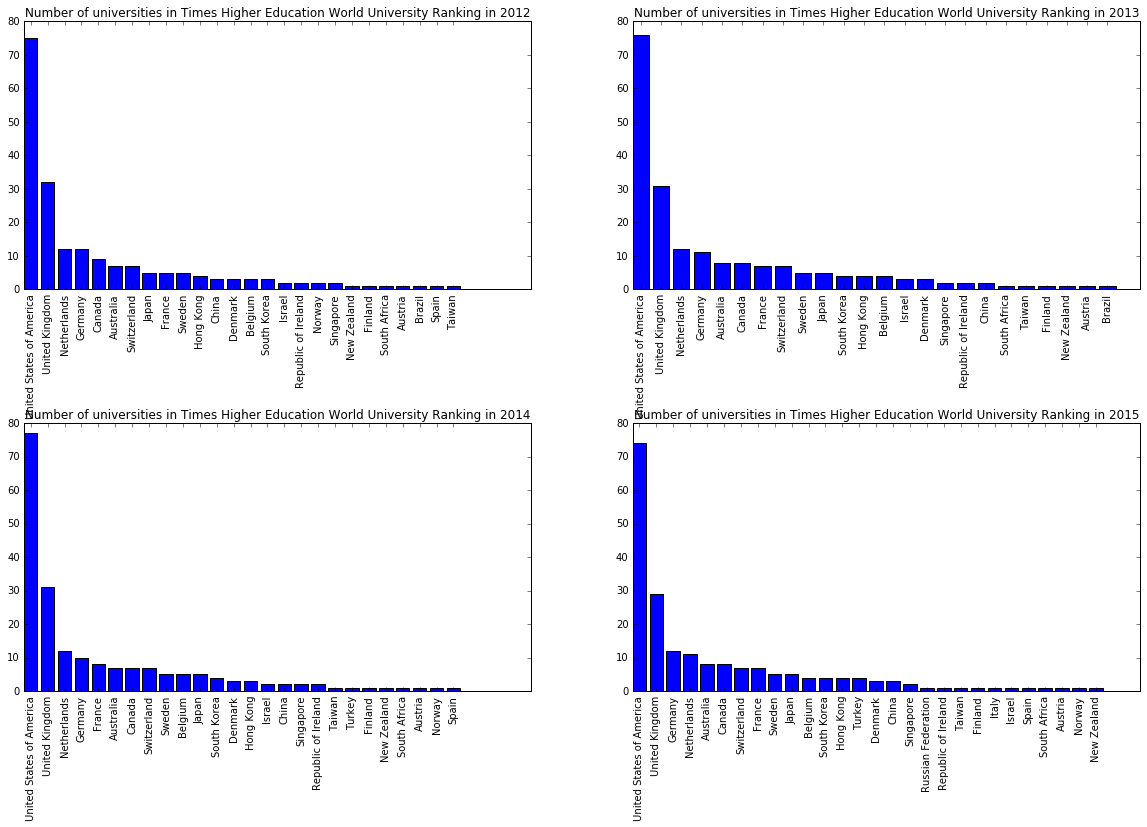

In [22]:
f,a = plt.subplots(2,2, figsize=(20,12))
a = a.ravel()
for i,ax in enumerate(a):
    n = np.arange(len(df1[df1['year'] == years[i]]['country'].value_counts())) 
    ax.bar(n, df1[df1['year'] == years[i]]['country'].value_counts().values)
    ax.set_xticks(n+0.4)
    xtickNames = ax.set_xticklabels(df1[df1['year'] == years[i]]['country'].value_counts().index)
    plt.setp(xtickNames, rotation = 90, fontsize = 10)
    f.subplots_adjust(hspace=.5)
    ax.set_title("Number of universities in Times Higher Education World University Ranking in %s" % years[i])

Аналогично можно построить распределения по странам и для двух других оставшихся рейтингов, помимо этого можно посмотреть университеты каких стран входят в 100 лучших по всем рейтингам за период с 2012 по 2015 года

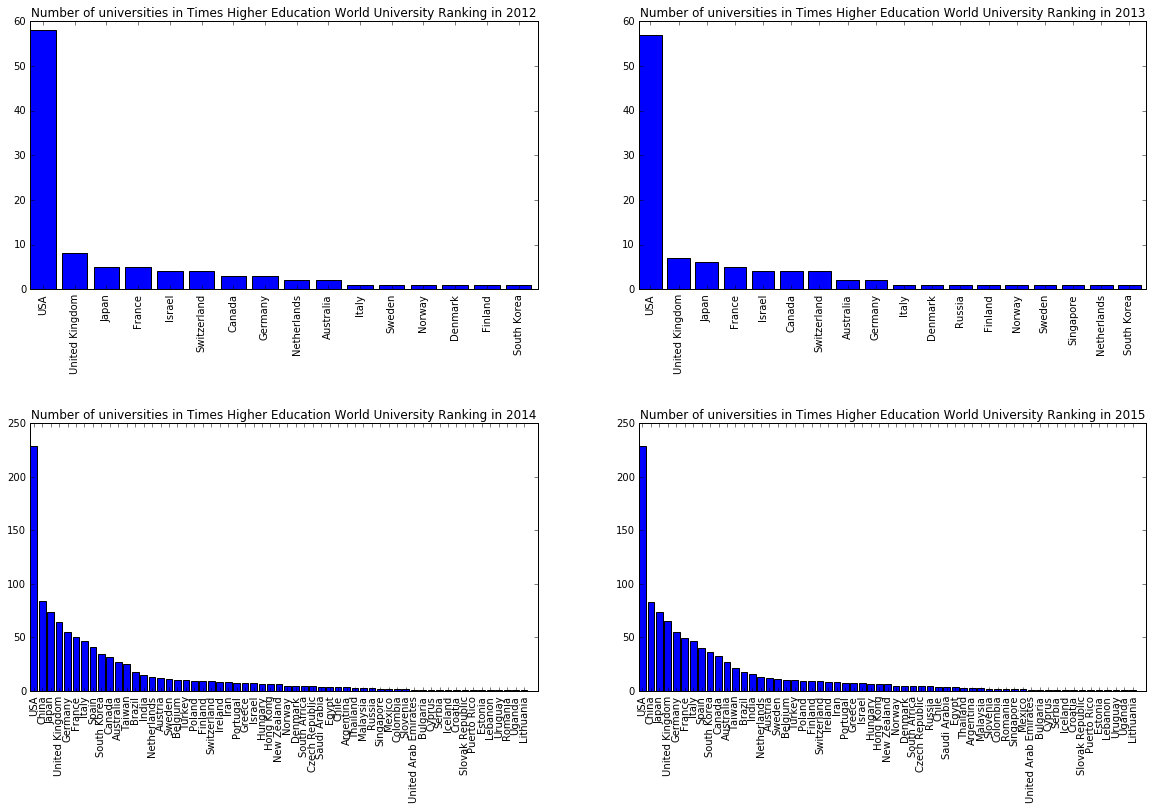

In [23]:
f,a = plt.subplots(2,2, figsize=(20,12))
a = a.ravel()
for i,ax in enumerate(a):
    n = np.arange(len(df3[df3['year'] == years[i]]['country'].value_counts())) 
    ax.bar(n, df3[df3['year'] == years[i]]['country'].value_counts().values)
    ax.set_xticks(n+0.4)
    xtickNames = ax.set_xticklabels(df3[df3['year'] == years[i]]['country'].value_counts().index)
    plt.setp(xtickNames, rotation = 90, fontsize = 10)
    f.subplots_adjust(hspace=.5)
    ax.set_title("Number of universities in Times Higher Education World University Ranking in %s" % years[i])

По количеству университетов, вошедших в международные рейтинги, лидирующими странами являются __США, Великобритания, Германия, Нидерланды, Япония, Канада__


In [24]:
# определим количество пропущенных значений в данных
df_non_all = [df1, df2, df3, attain_sup, expend_sup, school_country]
names = ['Times Higher Education World University Ranking', 'Academic Ranking of World Universities', 'Center for World University Rankings','Educational attainment', 'Education expenditure','School_Country']
# суммы пропущенных данных в строках
for i in range(len(df_non_all)):
    print ('Missing values in', names[i])
    print(df_non_all[i].isnull().sum())
    print('\n')

Missing values in Times Higher Education World University Ranking
world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               19
student_staff_ratio        19
international_students     20
female_male_ratio         123
year                        0
dtype: int64


Missing values in Academic Ranking of World Universities
world_rank            0
university_name       1
national_rank         1
total_score        3796
alumni                1
award                 2
hici                  2
ns                   22
pub                   2
pcp                   2
year                  0
country               0
dtype: int64


Missing values in Center for World University Rankings
world_rank                0
institution               0
country                   0


Наблюдается значительное сокращение числа университетов, включенных в рейтинги. В особенности это относится к рейтингу Center for World University Rankings, так как переменная broad_impact доступна только для 2014 и 2015. Для рейтинга Academic Ranking of World Universities, сокращение количеста университетов в основном связаны с отсутствием total_score начиная со 101 места


В первом рейтинге было выявлено наличие "-", вместо пропущенных значений, так как несмотря на отсутствие значений по некоторым показателям, университетам все равно присваивался рейтинг, то будем анализировать превый рейтинг, опустив пропущенные значения.

In [25]:
df1.iloc[4:5,:]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [26]:
indx1 = df1[ df1['total_score']=='-'].total_score.index
df1.ix[indx1,['total_score']] = np.nan
df1.total_score = df1.total_score.astype(float)

ind = df1[ df1['international']=='-'].international.index
df1.ix[ind,['international']] = np.nan
df1.international = df1.international.astype(float)

indx = df1[ df1['income']=='-'].income.index
df1.ix[indx,['income']] = np.nan
df1.income = df1.income.astype(float)

In [27]:
# Так же отметим еще раз, что мы сравниваем данные за период с 2012 по 2014, поэтому выделим данные именно за выбранный промежуток
DF1 = df1.iloc[200:,:]
DF2 = df2.iloc[3514:,:]
DF3 = df3

Посмотрим на корреляционную зависимость total_score от всех детерминирующих переменных по каждому рейтингу, что позволит:

1) Провести первичный анализ влияния факторов на формирование Total_Score и, соответственно, итогового места университета в рейтингах

2) Выявить направление влияния факторов на формирование total_score, что необходимо при анализе возможной коллинеарности детерминант, опредиляющих Total_Score и место университета в рейтинге

In [28]:
# корреляция total_score для рейтинга Times Higher Education World University Ranking
corr1 = DF1.corr(method = 'pearson', min_periods=1)
corr1.iloc[:5,5:6]

,total_score
teaching,0.904291
international,0.118382
research,0.912614
citations,0.529985
income,0.222885


Все переменные имеют положительную корреляцию с total_score, при чем наиболее сильная взаимосвязь с переменными:
* research (0.912614)
* teaching (0.904291)

In [29]:
# посмотрим на корреляцю между компонентами
corr = DF1.corr(method = 'pearson', min_periods=1)
corr11 = corr.iloc[0:5,0:5]
corr_array = np.array(corr11)
for i in range(len(corr11.columns)):
    for j in range(len(corr11.columns)):
        if i==j and corr_array[i][j] == 1:
            corr_array[i][j] = 0
        corr_array[i][j] = abs(corr_array[i][j])
unique = np.unique(corr_array)
sort = unique[::-1]
ans = []
a = corr11.columns
b = corr11.index
for n in sort:
    if n >= 0.8: # будем считать, что корреляция между компонентами > 0.8, будет считаться недопустимой, выведем пары 
        ans.append(n)
for i in range(len(corr11.columns)):
    for j in range(i+1):
        for _ in range(len(ans)):
            if abs(corr_array[i][j]) == ans[_]:
                print(a[i], b[j], corr_array[i][j])


research teaching 0.896439875864


так как обе переменные имеют положительное влияние на __total_score__, и переменная __research__ болле взаимосвязана с ней, то возможным является удаление переменной __teaching__

In [241]:
#оставим исследуемые признаки
DF_1 = DF1.dropna(how='any')
df1_X = DF_1.loc[:,['research','international','citations','income']]
df1_y = DF_1.iloc[:,8:9]

In [242]:
from sklearn.cross_validation import train_test_split
df1_train, df1_test, y1_train, y1_test = train_test_split(df1_X, df1_y, train_size=0.7, random_state=13)

In [266]:
#построим линейную регрессию
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(df1_train, y1_train)

print("Свободный член", model.intercept_[0]) 
print("Коэффициенты")
for i in range(4):
    print(df1_X.columns[i], model.coef_[0][i])

y1_prediction_test = model.predict(df1_test)
y1_prediction_train = model.predict(df1_train)

print('\n')
from sklearn.metrics import mean_squared_error
m1_test = mean_squared_error(y1_test, y1_prediction_test)
m1_train = mean_squared_error(y1_train, y1_prediction_train)
print('MSE_test:',m1_test,'\n','MSE_train:', m1_train)

print('\n')
from sklearn.metrics import r2_score
print('R^2 %.2f:' % r2_score(y1_test, y1_prediction_test))

Свободный член 2.33097494774
Коэффициенты
research 0.525942462694
international 0.0598159379939
citations 0.325273637756
income 0.0202611160728


MSE_test: 4.27437838584 
 MSE_train: 4.63001129462


R^2 0.97:


In [294]:
mse1 = {}
mse1['linreg'] = m1_test

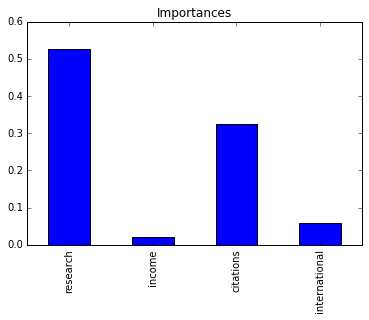

In [292]:
imp1_lr = {}
for i in range(4):
    imp1_lr[df1_X.columns[i]] = model.coef_[0][i]
pd.DataFrame.from_dict(data = imp1_lr, orient='index').plot(kind='bar', legend=False, title = 'Importances')

как видно из полученных статистик модель обладает высокой объясняющей способностью и при этом средняя квадратичная ошибка тестовой выборки не сильно отличается от ошибки на обучающей выборке, значение R^2 почти 1, что говорит о том, что total_score почти линейно зависит от признаков.
Наиболее важные признаки - Исследования и цитирование

In [33]:
# посмотрим, на сколько меняется total_score, при изменении всех признаков на 1
n = 0
for i in range(4):
    n = n + model.coef_[0][i]
print(n)

0.931293154517


Значение меняется почти на 1, так как мы исключили 1 признак

In [256]:
# анализ остатков коэффициентов регрессии
res_test = y1_test - y1_prediction_test

In [280]:
res_test.columns = ['Residuals']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002539CD47F98>]], dtype=object)

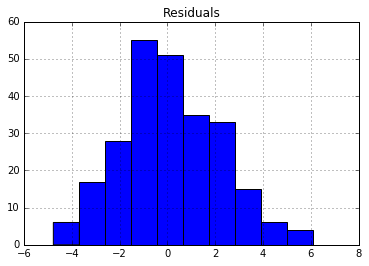

In [281]:
res_test.hist() # распределение остатков регрессии близко к нормальному

Построим Decision Tree Regression, для этого сначала найдем оптимальную глубину дерева

In [283]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import r2_score
kfold = 5 #количество подвыборок для валидации
itog_val = {} #список для записи результатов кросс валидации разных алгоритмов


min MSE is:, 5.466, optimum depth is, 23
Значимость признаков
teaching 0.164068078202
international 0.00804307419298
research 0.749059813353
citations 0.0747398691152
income 0.00408916513721


MSE_test: 6.2372
MSE_train: 0.0
R^2: 0.959613305688
val: 0.960297086344


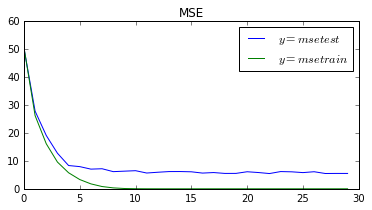

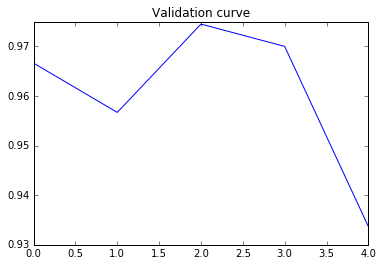

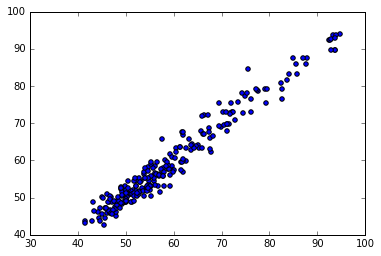

In [296]:
df1_X1 = DF_1.iloc[:,3:8] # выделим переменные, на основе которых строится рейтинг
df1_y1 = DF_1.total_score # выделим зависимую переменную total_score

# нет необходимости исключать переменную 'research',данные для анализа будут отличаться  
from sklearn.cross_validation import train_test_split #разобьем выбоку на тестовую и обучаюшую
df1_train, df1_test, y1_train, y1_test = train_test_split(df1_X1, df1_y1, train_size=0.7, random_state=13)
from sklearn import tree

#подберем оптимальную глубину
df1_tests = []
df1_trains = []
for i in range(1,31):
    regr = tree.DecisionTreeRegressor(max_depth=i)
    regr.fit(df1_train, y1_train)
    y1_prediction_test = regr.predict(df1_test)
    y1_prediction_train = regr.predict(df1_train)
    m1_test = mean_squared_error(y1_test, y1_prediction_test)
    m1_train = mean_squared_error(y1_train, y1_prediction_train)
    df1_tests.append(m1_test)
    df1_trains.append(m1_train)
    
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(df1_tests, label=r"$y = mse  test$")
ax.plot(df1_trains, label=r"$y = mse  train$")
ax.set_title('MSE')
ax.legend(loc=1)

mse1['tree'] = np.asarray(df1_tests).min()
print('min MSE is:',np.asarray(df1_tests).min(), 'optimum depth is', np.argmin(np.asarray(df1_tests))+1, sep = ', ')

from sklearn.tree import DecisionTreeRegressor
regres = tree.DecisionTreeRegressor(max_depth=np.argmin(np.asarray(df1_tests))+1)
regres.fit(df1_train, y1_train)

y1_prediction = regres.predict(df1_test)
y1_prediction_train = regres.predict(df1_train)

# выведем значимость признаков
print('Значимость признаков')
a1 = regres.feature_importances_
for i in range(len(a1)):
    print(df1_X1.columns[i], a1[i])

# обозначим меры качества, которые будем использовать при оценке моделей:
# оценка скользящего контроля, средняя квадратичная ошибка и Коэффициент детерминации R2
print('\n')
# средняя квадратичная ошибка на тестовой и на обучающей выборках:
mse_test = mean_squared_error(y1_test, y1_prediction)
mse_train = mean_squared_error(y1_train, y1_prediction_train)
print('MSE_test:',mse_test)
print('MSE_train:',mse_train)

# Коэффициент детерминации R2
r2 = r2_score(y1_test, y1_prediction)
print('R^2:', r2)

# найдем показатель скользящего контроля
scores = cross_val_score(regres, df1_X1, df1_y1, cv = kfold)
print('val:',scores.mean()) # в качестве итогового показателя возьмем среднее значение

plt.figure()
plt.plot(scores)
plt.title('Validation curve')

# Plot the results
plt.figure()
plt.scatter(y1_test, y1_prediction)
plt.show()


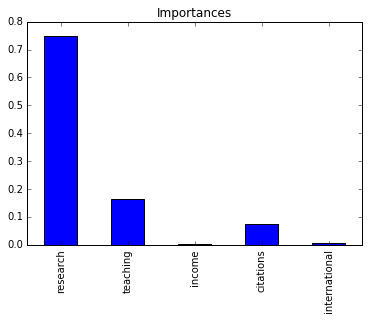

In [288]:
imp1_tr = {}
for i in range(len(a1)):
    imp1_tr[df1_X1.columns[i]] = a1[i]
pd.DataFrame.from_dict(data = imp1_tr, orient='index').plot(kind='bar', legend=False, title = 'Importances')

Данная модель также показала довольно высокую точность, но меньше, чем линейная. Ошибка на тестовой выборкесильно больше, чем на тестовой.
Отдельно стоит выделить, что исследования имеют очень высокий вес.

Построение Random Forest

In [300]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score, KFold
# определим оптимальное количество деревьев
cr_val = KFold(df1_X1.shape[0], n_folds = 5, shuffle = True, random_state=1)

result=[]
for i in range(1,51):
    regr = RandomForestRegressor(n_estimators = i, random_state=1)
    regr.fit(df1_train, y1_train)
    res = cross_val_score(regr, df1_X1, df1_y1, cv = cr_val, scoring='r2').mean()
    result.append(res)
a = max(result)
tree = result.index(a) # оптимальное количество деревьев

regr = RandomForestRegressor(n_estimators = tree, random_state=1)
regr.fit(df1_train, y1_train)

y1_prediction = regr.predict(df1_test)
y1_prediction_train = regr.predict(df1_train)

mse_test = mean_squared_error(y1_test, y1_prediction)
mse_train = mean_squared_error(y1_train, y1_prediction_train)
print('MSE_test:',mse_test)
print('MSE_train:',mse_train)

# Коэффициент детерминации R2
r2 = r2_score(y1_test, y1_prediction)
print('R^2:', r2)


MSE_test: 2.35101227173
MSE_train: 0.391499090382
R^2: 0.984776884829


In [301]:
mse1['rf'] = mse_test

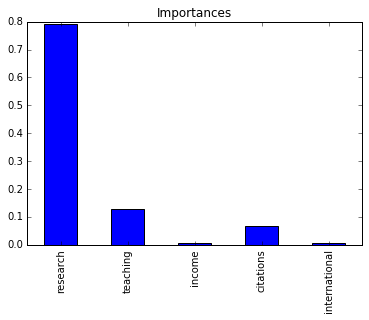

In [291]:
a1 = regr.feature_importances_
imp1_rf = {}
for i in range(len(a1)):
    imp1_rf[df1_X1.columns[i]] = a1[i]
pd.DataFrame.from_dict(data = imp1_rf, orient='index').plot(kind='bar', legend=False, title = 'Importances')

Оценка получилась весьма точной, лучше, чем на обычных деревьях по всем параметрам, кроме ошибки на обучающей выборке.

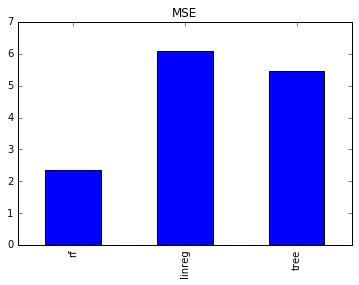

In [302]:
pd.DataFrame.from_dict(data = mse1, orient='index').plot(kind='bar', legend=False, title = 'MSE')

Выводы по первому рейтингу:
    Судя по полученным результатам различных регрессий, total_score строится линейно, возможно, с какими-то небольшими нюансами,
    такими, как округление.

Восстановим значения total score для рейтинга Academic Ranking of World Universities в период с 2012 по 2015
В осписании методологии этого рейтинга указаны коэффициенты, с которыми они берут различные показатели для подсчета итоговых баллов:
* 10% Alumni
* 20% Award
* 20% HiCi
* 20% N&S
* 20% PUB
* 10% PCP

In [39]:
# Воссоздадим пропущенные значения по заданной формуле.
# 2012
DF2.loc[3614:3798,'total_score'] = df2.loc[3614:3798,'alumni']*0.1 + df2.loc[3614:3798,'award']*0.2 + df2.loc[3614:3798,'hici']*0.2 + df2.loc[3614:3798,'ns']*0.2 + df2.loc[3614:3798,'pub']*0.2 + df2.loc[3614:3798,'pcp']*0.1
# в 2013 году в рейтинге отсутствуют пропущенные значения
# в 2014
DF2.loc[3997:4397,'total_score'] = df2.loc[3997:4397,'alumni']*0.1 + df2.loc[3997:4397,'award']*0.2 + df2.loc[3997:4397,'hici']*0.2 + df2.loc[3997:4397,'ns']*0.2 + df2.loc[3997:4397,'pub']*0.2 + df2.loc[3997:4397,'pcp']*0.1
# в 2015
DF2.loc[4497:4897,'total_score'] = df2.loc[4497:4897,'alumni']*0.1 + df2.loc[4497:4897,'award']*0.2 + df2.loc[4497:4897,'hici']*0.2 + df2.loc[4497:4897,'ns']*0.2 + df2.loc[4497:4897,'pub']*0.2 + df2.loc[4497:4897,'pcp']*0.1


C:\Users\Aspire\Anaconda3\lib\site-packages\pandas\core\indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [40]:
# корреляция total_score для рейтинга Academic Ranking of World Universities
corr2 = DF2.iloc[:,:10].corr(method = 'pearson', min_periods=1)
corr2.iloc[1:,:1] 

,total_score
alumni,0.818420
award,0.871577
hici,0.908155
ns,0.941100
pub,0.748068
pcp,0.771833


Все переменные имеют положительную корреляцию с total_score, при чем наиболее сильная взаимосвязь с переменными: 
* ns - баллы университета за публикации в Nature and Science
* hici - баллы университета за высоко оцененных исследователей 
* award - баллы университета за успешних преподавателей(лауреаты Нобелевской премии)

In [52]:
# Выявим среди детерминирующих переменных,наиболее коррелированные (для исправления мультиколлинеарности в последствии)
corr = DF2.corr(method = 'pearson', min_periods=1)
corr22 = corr.iloc[1:10,1:10]
corr_array = np.array(corr22)
for i in range(len(corr22.columns)):
    for j in range(len(corr22.columns)):
        if i==j and corr_array[i][j] == 1:
            corr_array[i][j] = 0
        corr_array[i][j] = abs(corr_array[i][j])
unique = np.unique(corr_array)
sort = unique[::-1]
ans = []
a = corr22.columns
b = corr22.index
for n in sort:
    if n>= 0.8:
        ans.append(n)
for i in range(len(corr22.columns)):
    for j in range(i+1):
        for _ in range(len(ans)):
            if abs(corr_array[i][j]) == ans[_]:
                print(a[i], b[j], corr_array[i][j])
    

ns hici 0.882471616806


Так как переменные ns и hici сильно коррелированы необходимо исключить из анализа одну из этих переменных, так как зависимость total_score с переменной ns выше (0.941100), чем с переменной hici (0.908155), то возможно в дальнейшем исключить переменную hici из анализа рейтинга Academic Ranking of World Universities

Линейная регрессия для второго рейтинга

In [48]:
DF_2 = DF2.dropna(how = 'any')
df2_X = DF_2.iloc[:,4:10]
df2_y = DF_2.total_score
df2_train, df2_test, y2_train, y2_test = train_test_split(df2_X, df2_y, train_size=0.7, random_state = 13)


In [304]:
model = LinearRegression(fit_intercept=True)
model.fit(df2_train, y2_train)

print("Свободный член", model.intercept_) 
print("Коэффициенты")
for i in range(6):
    print(df2_X.columns[i], model.coef_[i])

y2_prediction_test = model.predict(df2_test)
y2_prediction_train = model.predict(df2_train)

print('\n')
from sklearn.metrics import mean_squared_error
m2_test = mean_squared_error(y2_test, y2_prediction_test)
m2_train = mean_squared_error(y2_train, y2_prediction_train)
print('MSE_test:',m2_test,'\n','MSE_train:', m2_train)

print('\n')
from sklearn.metrics import r2_score
print('R^2 %.2f:' % r2_score(y2_test, y2_prediction_test))

Свободный член -0.344114980273
Коэффициенты
alumni 0.103233297741
award 0.209308326863
hici 0.209877608975
ns 0.204185101332
pub 0.205790214964
pcp 0.100097991822


MSE_test: 0.0475231065685 
 MSE_train: 0.0369862598233


R^2 1.00:


Линейное построение данного рейтинга полностью подтвердилось, погрешность весов и ошибка очень низки.

In [51]:
n = 0
for i in range(6):
    n = n + model.coef_[i]
print(n)

1.0324925417


Изменение total_score при увеличении всех признаков на 1 почти равно 1.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002539D273A20>]], dtype=object)

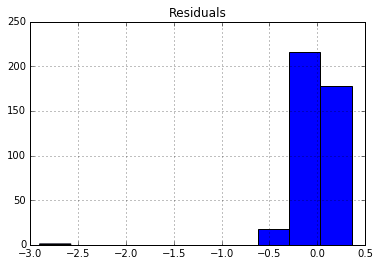

In [312]:
#гистограмма отклонений почти вся лежит в отреке от -0.5 до 0.5
res_test = y2_test - y2_prediction_test
res_test = pd.DataFrame(res_test)
res_test.columns = ['Residuals']
res_test.hist()

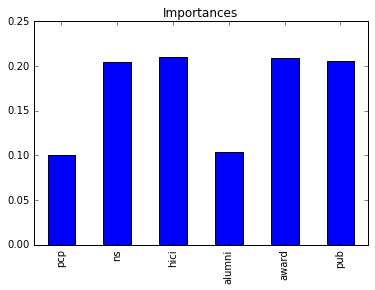

In [313]:
imp2_lr = {}
for i in range(6):
    imp2_lr[df2_X.columns[i]] = model.coef_[i]
pd.DataFrame.from_dict(data = imp2_lr, orient='index').plot(kind='bar', legend=False, title = 'Importances')

In [54]:
# корреляция total_score для рейтинга 'Center for World University Rankings'
corr3 = df3.corr(method = 'pearson', min_periods=1)
corr3.iloc[1:10,10:11]

,score
national_rank,-0.199756
quality_of_education,-0.600541
alumni_employment,-0.510374
quality_of_faculty,-0.693540
publications,-0.522111
influence,-0.522837
citations,-0.522438
broad_impact,-0.531590
patents,-0.474810


Все переменные имеют отрицательную корреляцию с переменной score, так как в данном рейтинге наибольшее количество итоговых баллов присуждалось университету набравшему скммарно наименьшее количество очков (мест) по всем категориям. Ниболее коррелированы переменные: quality_of_faculty (-0.693540) и quality_of_education (-0.600541)

In [55]:
corr = df3.corr(method = 'pearson', min_periods=1)
corr33 = corr.iloc[1:10,1:10]
corr_array = np.array(corr33)
for i in range(len(corr33.columns)):
    for j in range(len(corr33.columns)):
        if i==j and corr_array[i][j] == 1:
            corr_array[i][j] = 0
        corr_array[i][j] = abs(corr_array[i][j])
unique = np.unique(corr_array)
sort = unique[::-1]
ans = []
a = corr33.columns
b = corr33.index
for n in sort:
    if n>= 0.8:
        ans.append(n)
for i in range(len(corr33.columns)):
    for j in range(i+1):
        for _ in range(len(ans)):
            if abs(corr_array[i][j]) == ans[_]:
                print(a[i], b[j], corr_array[i][j])

influence publications 0.874951645927
citations publications 0.829911697177
citations influence 0.845206806088
broad_impact publications 0.917877845939
broad_impact influence 0.916040261401
broad_impact citations 0.852638025259


Особенностью данного рейтинга, является то, что переменная broad_impact была включена в рейтинг, начиная с 2014, так как между ней и другими пременными существует недопустимая корреляция, мы предлагаем убрать эту переменную из нашего последующего анализа. Переменные influence, publications, citations имеют примерно одинаковую корреляцию с итоговой переменной, мы решили оставить переменную citations, так как у нее выше значение корреляции и пременной score, и преременная с подобной смысловой нагрузкой также встречается в остальных рейтингах

In [316]:
DF3 = df3.loc[:,['national_rank','quality_of_education', 'alumni_employment', 'quality_of_faculty', 'citations', 'patents','score']]

In [317]:
DF_3 = DF3.dropna(how = 'any')
df3_X = DF_3.iloc[:,:6]
df3_y = DF_3.score
df3_train, df3_test, y3_train, y3_test = train_test_split(df3_X, df3_y, train_size=0.7, random_state = 13)

In [318]:
model = LinearRegression(fit_intercept=True)
model.fit(df3_train, y3_train)

print("Свободный член", model.intercept_) 
print("Коэффициенты")
for i in range(6):
    print(df3_X.columns[i], model.coef_[i])

y3_prediction_test = model.predict(df3_test)
y3_prediction_train = model.predict(df3_train)

print('\n')
m3_test = mean_squared_error(y3_test, y3_prediction_test)
m3_train = mean_squared_error(y3_train, y3_prediction_train)
print('MSE_test:',m3_test,'\n','MSE_train:', m3_train)

print('\n')
print('R^2 %.2f:' % r2_score(y3_test, y3_prediction_test))

Свободный член 62.3399870355
Коэффициенты
national_rank -0.00614052086837
quality_of_education -0.00380189346447
alumni_employment -0.00516643670682
quality_of_faculty -0.0566355123658
citations -0.00141823015445
patents -0.00181203929468


MSE_test: 30.7227306999 
 MSE_train: 29.0342204421


R^2 0.55:


Построение данного рейтинга по признакам явно не линейно.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002539E598390>]], dtype=object)

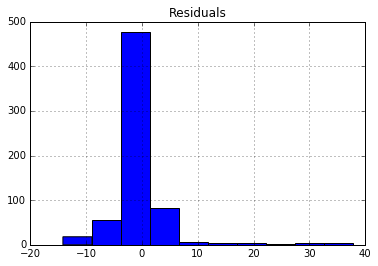

In [321]:
res_test = y3_test - y3_prediction_test
res_test = pd.DataFrame(res_test)
res_test.columns = ['Residuals']
res_test.hist()

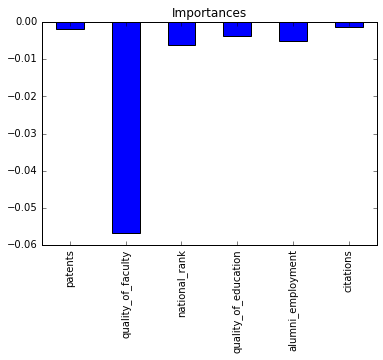

In [322]:
imp3_lr = {}
for i in range(6):
    imp3_lr[df3_X.columns[i]] = model.coef_[i]
pd.DataFrame.from_dict(data = imp3_lr, orient='index').plot(kind='bar', legend=False, title = 'Importances')

In [323]:
mse3 = {}
mse3['linreg'] = m3_test

DecisionTreeRegressor

min MSE is:, 4.17744246212, optimum depth is, 27
Значимость признаков
national_rank 0.0124216020556
quality_of_education 0.0382099722482
alumni_employment 0.0406403036788
quality_of_faculty 0.722618594332
citations 0.178626696094
patents 0.00748283159108


MSE_test: 4.57991246212
MSE_train: 0.000869989177489
R^2: 0.933555281311
val: -2.24961368682


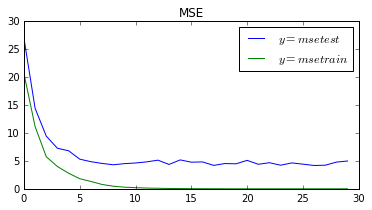

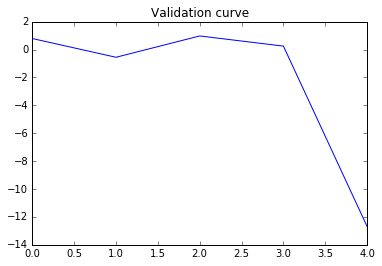

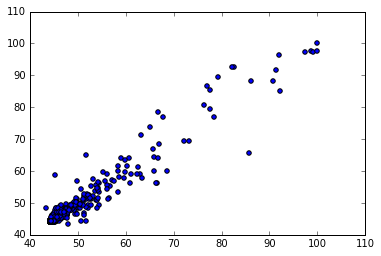

In [325]:
df3_tests = []
df3_trains = []
from sklearn import tree
#подберем оптимальную глубину
for i in range(1,31):
    regr = tree.DecisionTreeRegressor(max_depth=i)
    regr.fit(df3_train, y3_train)
    y3_prediction_test = regr.predict(df3_test)
    y3_prediction_train = regr.predict(df3_train)
    m3_test = mean_squared_error(y3_test, y3_prediction_test)
    m3_train = mean_squared_error(y3_train, y3_prediction_train)
    df3_tests.append(m3_test)
    df3_trains.append(m3_train)
    
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(df3_tests, label=r"$y = mse  test$")
ax.plot(df3_trains, label=r"$y = mse  train$")
ax.set_title('MSE')
ax.legend(loc=1)

mse3['tree'] = np.asarray(df3_tests).min()
print('min MSE is:',np.asarray(df3_tests).min(), 'optimum depth is', np.argmin(np.asarray(df3_tests))+1, sep = ', ')

from sklearn.tree import DecisionTreeRegressor
regres = tree.DecisionTreeRegressor(max_depth=np.argmin(np.asarray(df3_tests))+1)
regres.fit(df3_train, y3_train)

y3_prediction = regres.predict(df3_test)
y3_prediction_train = regres.predict(df3_train)

# выведем значимость признаков
print('Значимость признаков')
a1 = regres.feature_importances_
for i in range(len(a1)):
    print(df3_X.columns[i], a1[i])

# обозначим меры качества, которые будем использовать при оценке моделей:
# оценка скользящего контроля, средняя квадратичная ошибка и Коэффициент детерминации R2
print('\n')
# средняя квадратичная ошибка на тестовой и на обучающей выборках:
mse_test = mean_squared_error(y3_test, y3_prediction)
mse_train = mean_squared_error(y3_train, y3_prediction_train)
print('MSE_test:',mse_test)
print('MSE_train:',mse_train)

# Коэффициент детерминации R2
r2 = r2_score(y3_test, y3_prediction)
print('R^2:', r2)

# найдем показатель скользящего контроля
scores = cross_val_score(regres, df3_X, df3_y, cv = kfold)
print('val:',scores.mean()) # в качестве итогового показателя возьмем среднее значение

plt.figure()
plt.plot(scores)
plt.title('Validation curve')

# Plot the results
plt.figure()
plt.scatter(y3_test, y3_prediction)
plt.show()

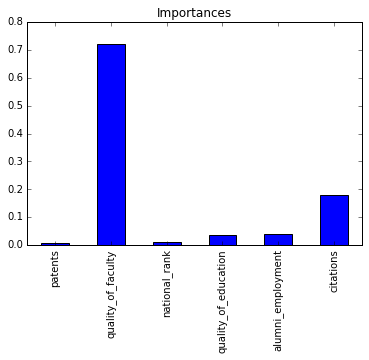

In [326]:
imp3_tr = {}
for i in range(len(a1)):
    imp3_tr[df3_X.columns[i]] = a1[i]
pd.DataFrame.from_dict(data = imp3_tr, orient='index').plot(kind='bar', legend=False, title = 'Importances')

Точность довольно высокая, различия на тестовой и обучающей выборке весьма существенные.

In [330]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score, KFold
# определим оптимальное количество деревьев
cr_val = KFold(df3_X.shape[0], n_folds = 5, shuffle = True, random_state=1)

result=[]
for i in range(1,51):
    regr = RandomForestRegressor(n_estimators = i, random_state=1)
    regr.fit(df3_train, y3_train)
    res = cross_val_score(regr, df3_X, df3_y, cv = cr_val, scoring='r2').mean()
    result.append(res)
a = max(result)
tree = result.index(a) # оптимальное количество деревьев

regr = RandomForestRegressor(n_estimators = tree, random_state=1)
regr.fit(df3_train, y3_train)

y3_prediction = regr.predict(df3_test)
y3_prediction_train = regr.predict(df3_train)

mse_test = mean_squared_error(y3_test, y3_prediction)
mse_train = mean_squared_error(y3_train, y3_prediction_train)
print('MSE_test:',mse_test)
print('MSE_train:',mse_train)

# Коэффициент детерминации R2
r2 = r2_score(y3_test, y3_prediction)
print('R^2:', r2)


MSE_test: 1.95821532729
MSE_train: 0.269357654887
R^2: 0.971590490511


Точность получлась лучшей из 3х моделей, различия оценки на тестовой и обучающей выборке невысокие.

In [335]:
mse3['rf'] = mse_test
a1 = regr.feature_importances_
for i in range(len(a1)):
    print(df3_X.columns[i], a1[i])


national_rank 0.0107718893525
quality_of_education 0.0480500473497
alumni_employment 0.0698077683721
quality_of_faculty 0.695909685684
citations 0.149756189014
patents 0.0257044202277


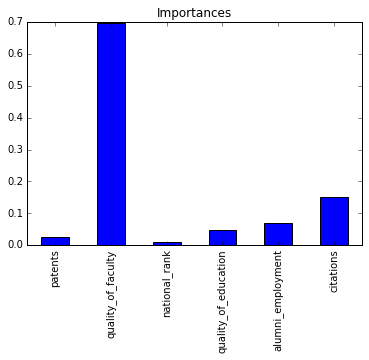

In [333]:
imp3_rf = {}
for i in range(len(a1)):
    imp3_rf[df3_X.columns[i]] = a1[i]
pd.DataFrame.from_dict(data = imp3_rf, orient='index').plot(kind='bar', legend=False, title = 'Importances')

Наиболее важный признак - качество преподавательского состава.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002539E871080>]], dtype=object)

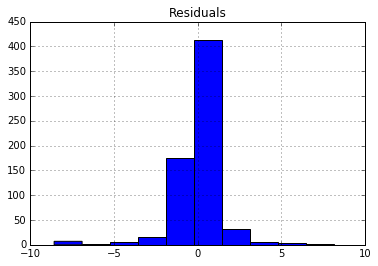

In [334]:
#гистограмма отклонений смещена в положительную сторону

res_test = y3_test - y3_prediction
res_test = pd.DataFrame(res_test)
res_test.columns = ['Residuals']
res_test.hist()


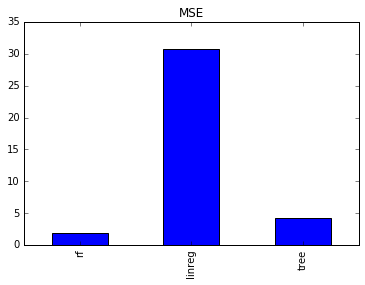

In [336]:
pd.DataFrame.from_dict(data = mse3, orient='index').plot(kind='bar', legend=False, title = 'MSE')

Применим логистическую регрессию и метод наивного Байеса

In [ ]:
Возьмем вузы из 3го рейтинга за 2014й год и разобьем их на 20 классов(уровней) от 0 до 19 

In [233]:
df3_2014 = df3[df3['year'] == 2014]
a = []
for index, row in df3_2014.iterrows():
    a.append((index-200) // 50)
df3_2014['level'] = a

In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [235]:
DF3_2014 = df3_2014.loc[:,['national_rank','quality_of_education', 'alumni_employment', 'quality_of_faculty', 'citations', 'patents','level']]
df3_X = DF3_2014.iloc[:,:6]
df3_y = DF3_2014.level
df3_train, df3_test, y3_train, y3_test = train_test_split(df3_X, df3_y, train_size=0.7, random_state = 13)

In [236]:
model = LogisticRegression(penalty='l1')
model.fit(df3_X, list(df3_y))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [227]:
predicted = model.predict(df3_X)
expected = list(df3_y)

In [228]:
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.56      0.80      0.66        50
          1       0.54      0.30      0.38        50
          2       0.45      0.56      0.50        50
          3       0.24      0.12      0.16        50
          4       0.27      0.40      0.32        50
          5       0.22      0.12      0.16        50
          6       0.16      0.28      0.20        50
          7       0.19      0.14      0.16        50
          8       0.16      0.22      0.19        50
          9       0.14      0.18      0.16        50
         10       0.33      0.02      0.04        50
         11       0.11      0.10      0.11        50
         12       0.03      0.02      0.02        50
         13       0.00      0.00      0.00        50
         14       0.20      0.22      0.21        50
         15       0.18      0.38      0.24        50
         16       0.14      0.02      0.04        50
         17       0.12      0.04      0.06   

При использовании l1 точность немного повышается.

In [213]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(df3_X, list(df3_y))
print(model)

expected = list(df3_y)
predicted = model.predict(df3_X)

print(metrics.classification_report(expected, predicted))

GaussianNB()
             precision    recall  f1-score   support

          0       0.66      0.74      0.70        50
          1       0.56      0.54      0.55        50
          2       0.41      0.32      0.36        50
          3       0.23      0.14      0.18        50
          4       0.41      0.14      0.21        50
          5       0.33      0.08      0.13        50
          6       0.00      0.00      0.00        50
          7       0.11      0.02      0.03        50
          8       0.00      0.00      0.00        50
          9       0.00      0.00      0.00        50
         10       0.00      0.00      0.00        50
         11       0.06      0.40      0.11        50
         12       0.00      0.00      0.00        50
         13       0.00      0.00      0.00        50
         14       0.00      0.00      0.00        50
         15       0.10      0.30      0.15        50
         16       0.00      0.00      0.00        50
         17       0.00      0.00

C:\Users\Aspire\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Оба метода показали не самую лучшую точность, особенно плохо предсказываются уровни вузов в середине рейтинга
(что логично, так как ошибка приходится в 2 стороны)
Но всё же логистическая регрессия оказалась более точной.

__ Выводы проекта: __

Мы провели исследование трех рейтингов университетов, используя различные методы анализа днных. Для каждого рейтинга, мы построили линейную регрессию, дерево решений и случайный лес. На первом рейтинге в линейной регресии ошибки на тестовой и обучающей выборке мало различались, что говорит о высоком качесве модели, а значение R^2 бликое к 1 свидетельсвует о почти линейной зависимости между показателем total score и осталными признаками. 


По итогам ллинейной регрессии наиболее важными признаками оказались исследования и цитироание. Саммую большую значимость показала переменная исследований и при построении дерева решений. 


Нам пришлось восстановить большое число пропущенных даных в переменной total score во втором рейтинге (3796 из 4897), поэтому total score линейно зависит от остальных признков. Построение линейной регрессии полностью повторило коэффициенты переменных, используемых авторами рейтинга. Так как большая часть признаков берется с коэффициентом 0,2, сложно выделить несоклько главных компонентов, более всего влияющих на место университета в рейтинге. 


Крайне низкие коэффициенты признаков в линейной регрессии для третьего рейтинга явно говорят о нелинейной зависимости между total score и остальными признаками. Как дерево решений, так и случайный лес показали высокую предсказательную способность модели, но в случайном лесе меньше разница между ошибками на тестовых выборках и на обучающих выборках, что говорит о лучшей применимости этого алгоритма к данному рейтингу. Оба метода показали в качестве наиболее значимого признака качество преподавательского состава. Примененные к данному рейтингу классификации высокой точности не показали.


Таким образом, теперь мы можем с высокой точностью построить рейтинг университетов, используя новые данные (например, данные 2016 года). Главными пременными, оказывающими наибольшее влияние на значение total score, оказались исследования и качество преподавательского состава, а значит, для высших учебных заведений крайне важно иметь высоко квалифицированнх преподавателей, что в свою очередь будет положительно влиять на остальные признаки.